# Heterogeneous medium

In [1]:
import numpy as np

from jax import jit
from jax import numpy as jnp
from jaxdf import FourierSeries
from matplotlib import pyplot as plt

from jwave import FourierSeries
from jwave.acoustics import simulate_wave_propagation
from jwave.geometry import *
from jwave.geometry import _circ_mask
from jwave.utils import show_field, show_positive_field

domain = Domain((128, 128), (0.1e-3, 0.1e-3))

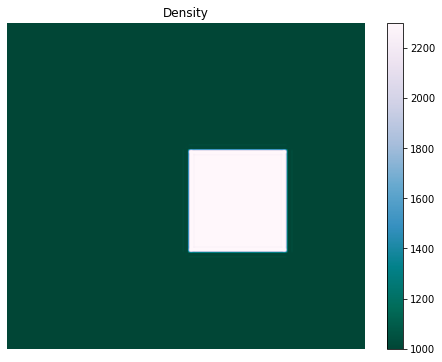

In [2]:
density = np.ones(domain.N) * 1000
density[50:90, 65:100] = 2300
density = FourierSeries(np.expand_dims(density, -1), domain)

show_positive_field(density)
_ = plt.title("Density")

In [3]:
medium = Medium(domain=domain, sound_speed=1500.0, density=density)
time_axis = TimeAxis.from_medium(medium, cfl=0.3)

In [4]:
# Defining the initial pressure

N = domain.N
p0 = _circ_mask(N, 3, (64, 30))

p0 = 1.0 * jnp.expand_dims(p0, -1)
p0 = FourierSeries(p0, domain)

Text(0.5, 1.0, 'Initial pressure')

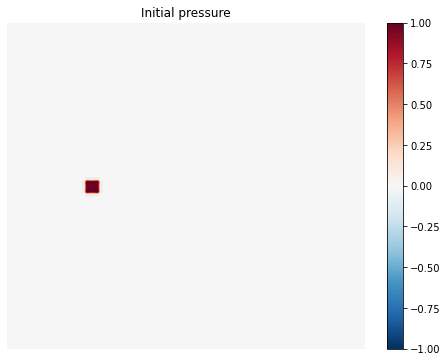

In [5]:
show_field(p0)
plt.title("Initial pressure")

In [6]:
@jit
def compiled_simulator(c, p0):
    medium = Medium(domain=domain, sound_speed=1500.0, density=c)
    return simulate_wave_propagation(medium, time_axis, p0=p0)

In [7]:
pressure = compiled_simulator(density, p0)

Text(0.5, 1.0, 'Pressure field at t=5.4000001910026185e-06')

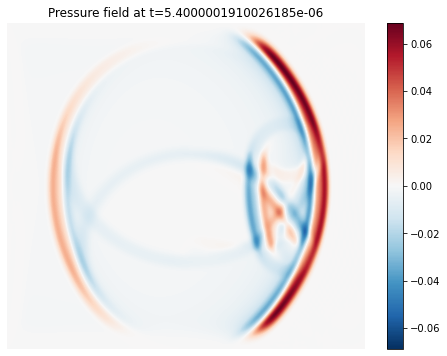

In [8]:
t = 270
show_field(pressure[t])
plt.title(f"Pressure field at t={time_axis.to_array()[t]}")

In [9]:
pressure = compiled_simulator(1000.0, p0)  # Works with different input types

Text(0.5, 1.0, 'Pressure field at t=5.4000001910026185e-06')

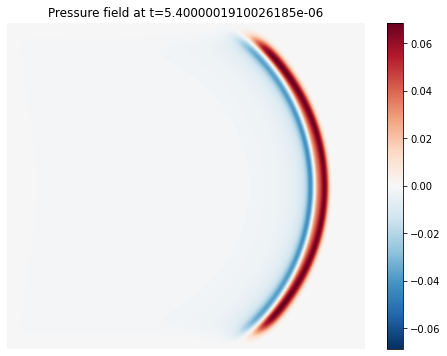

In [10]:
t = 270
show_field(pressure[t])
plt.title(f"Pressure field at t={time_axis.to_array()[t]}")

In [11]:
from jaxdf import FiniteDifferences

density = np.ones(domain.N) * 1000
density[50:90, 65:100] = 2300
density = FiniteDifferences(np.expand_dims(density, -1), domain, accuracy=8)

N = domain.N
p0 = _circ_mask(N, 3, (64, 30))

p0 = 1.0 * jnp.expand_dims(p0, -1)
p0 = FiniteDifferences(p0, domain, accuracy=8)

In [12]:
pressure = compiled_simulator(density, p0)

Text(0.5, 1.0, 'Pressure field at t=5.4000001910026185e-06')

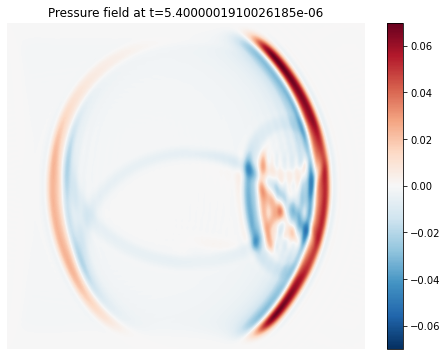

In [13]:
t = 270
show_field(pressure[t])
plt.title(f"Pressure field at t={time_axis.to_array()[t]}")